[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-03.ipynb)


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [3]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape # feature

(768, 9)

In [6]:
y = df['Outcome']
y.shape # label

(768,)

In [7]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( # random하게 sampling함
    X, y, test_size=0.2, random_state=42) # random하게 sampling 되지 않도록 radom_state를 지정해줌

80%는 train set로 20%는 test set로 설정

X : feature

y : label값

In [8]:
X_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,102.5,True
618,112,82,24,28.2,1.282,50,True,169.5,False
346,139,46,19,28.7,0.654,22,False,83.0,False
294,161,50,0,21.9,0.254,65,False,102.5,False
231,134,80,37,46.2,0.238,46,False,370.0,False
...,...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,False,140.0,False
106,96,122,0,22.4,0.207,27,False,102.5,True
270,101,86,37,45.6,1.136,38,True,169.5,False
435,141,0,0,42.4,0.205,29,False,169.5,False


In [9]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape # 전체 데이터의 80%

((614, 9), (614,))

In [10]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape # 전체 데이터의 20%

((154, 9), (154,))

## 머신러닝 알고리즘 사용하기

In [11]:
# DecisionTree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier # 당뇨병 여부를 맞추는 Classification 문제이기 때문에 Classifier 불러옴
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

동일한 조건에서 동일한 accuracy가 나오도록 하고 싶다면 random_state를 설정해준다

In [12]:
# 모델을 학습시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [13]:
# 예측을 하고, 결과를 y_predict에 담습니다. 0이면 당뇨병이 발병하지 않고, 1은 발병합니다.
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [14]:
# 다르게 예측한 갯수를 구해서 diff_count 에 넣습니다.
abs(y_predict - y_test).sum()

28

28개가 틀렸다고 나오는데 데이터를 랜덤하게 섞었으므로 지난번보다 더 많이 틀렸다고 생각해볼 수 있습니다.

모델링을 할 때마다 diff_count가 달라지는데,
동일 조건에서 동일 accuracy가 나오게 하고 싶다면 모델에서 random_state를 같은 숫자로 지정해줍니다.

In [15]:
from sklearn.metrics import accuracy_score
 
accuracy_score(y_test, y_predict) * 100

81.81818181818183

accuracy score를 구합니다. 지난 모델에서는 오버피팅이 발생한 것으로 예상할 수 있습니다.

In [16]:
feature_names = X_train.columns.tolist() # feature에 사용할 name들

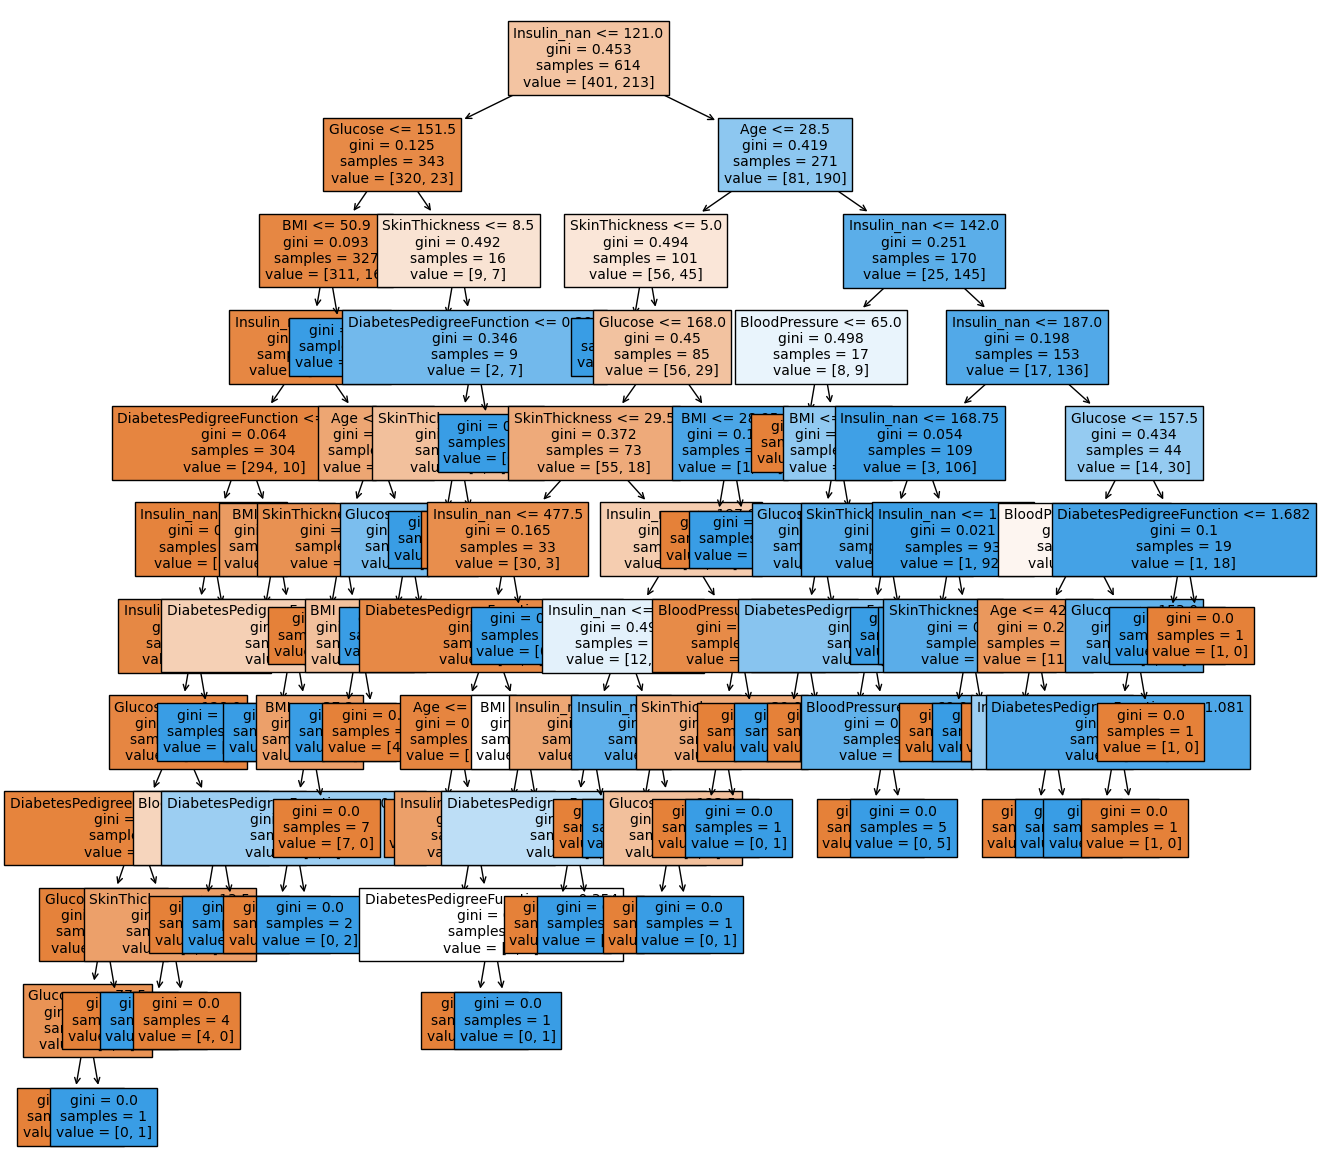

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15)) # tree 사이즈 조정
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True) # Tree 색상을 나눠 구분 : filled = True

만약 plot_tree 기능을 사용할 수 없다면 라이브러리를 업데이트 해야 합니다.

 

plt.figure으로 사이즈를 지정하고, filled를 True로 설정하면 색상이 생깁니다.

 

Insulin이 가장 상위 조건으로 나뉘고, gini 계수가 0이면 tree 그리기를 멈춥니다.

샘플의 개수가 밑으로 갈수록 줄어듭니다.

 

max_depth는 트리의 깊이를 나타냅니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

max_depth 값을 조정하기만 해도 성능이 좋아집니다. 너무 tree 깊이가 얕으면 언더피팅이 일어납니다.

max_depth 값을 일일히 넣어서 조정하기 어렵다.

for문을 통해 최적의 max_depth 찾는다.

### 최적의 max_depth 값 찾기 (for문 이용)

In [19]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12): # max_depth 3부터 12까지 넣으면서 정확도 검사
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


for문 안에 모델을 넣으면 max_depth 파라미터를 바꿔가면서 모델을 학습시킵니다.
다른 파라미터를 변경해도 성능이 향상될 수 있습니다.

max_depth가 4일때 정확도가 가장 높다.

### Grid Search

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

<img src = "https://cphinf.pstatic.net/mooc/20200513_76/1589312449818Af1eW_PNG/mceclip1.png">

cross validation은 train 데이터셋을 여러 fold로 나눠서 평균을 내는 방법입니다.

In [20]:
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12),
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]} # max_features : 전체의 몇% 를 feature로 사용할 것인지?
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2) 
clf.fit(X_train, y_train)

# n_grid = -1 : 사용가능한 모든 프로세서 사용
# cv = 5 : cross validation을 5개의 조각으로 나눔
# verbose = 2 : log 출력

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

param_grid에는 튜닝하고 싶은 파라미터 정보를 넣습니다.

max_features는 일부 feature만 사용하고 싶을 때 사용합니다. 1은 전체라는 뜻입니다.

n_jobs는 -1로 설정하여 사용 가능한 모든 장비를 학습에 이용합니다.

cv는 cross validation을 5개로 나눕니다.

verbose를 1로 하여 로그를 찍으면서 학습을 합니다. 0이면 로그를 출력하지 않습니다.

In [21]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

가장 성능이 좋은 파라미터를 찾아줍니다.

In [22]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

가장 좋은 성능을 내는 파라미터 조합 전체를 알려줍니다.

In [23]:
clf.best_score_

0.8664934026389444

가장 좋은 점수를 알려줍니다.

In [24]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.002193,3.986359e-04,0.001595,4.883246e-04,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.002990,6.302233e-04,0.001395,4.878382e-04,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.003588,4.882079e-04,0.000997,1.168008e-07,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.002990,5.309834e-07,0.000798,3.988029e-04,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.001794,1.162336e-03,0.000450,5.571239e-04,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


 cv_results_는 cross validation 결과를 데이터프레임으로 반환합니다. score을 내림차순으로 확인할 수 있습니다.

In [25]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

예측을 진행하여 답안지를 만듭니다.

In [26]:
clf.score(X_test, y_test)

0.8701298701298701

test셋에서 더 좋은 스코어가 나왔습니다.

### Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

Grid Search는 우리가 설정한 범위 안에서만 parameter을 탐색하지만

Random Search는 좋은 성능을 낼 수 있는 랜덤값을 탐색합니다.

In [27]:
model

DecisionTreeClassifier(random_state=42)

In [28]:
max_depth = np.random.randint(3, 20, 10) # 3 ~ 20 중 10개의 랜덤한 값 리스트로 출력
max_depth

array([ 4, 12, 17, 18, 19, 17, 12,  6, 12,  7])

In [30]:
max_features = np.random.uniform(0.7, 1.0, 100) # 0.7 ~ 1.0 중 100개의 랜덤한 값 리스트로 출력
max_features

array([0.97822926, 0.84701979, 0.77535557, 0.80719742, 0.78790881,
       0.75554455, 0.76785948, 0.82856796, 0.78819822, 0.94966319,
       0.96775499, 0.82403629, 0.81727253, 0.99850114, 0.70809654,
       0.89367689, 0.80992008, 0.88303828, 0.7640146 , 0.99353494,
       0.92928695, 0.73983785, 0.71587779, 0.94567896, 0.83388609,
       0.80002446, 0.71229775, 0.86259604, 0.88301198, 0.71922861,
       0.97494629, 0.86828329, 0.97048665, 0.76018236, 0.97871938,
       0.94854566, 0.85590647, 0.72204414, 0.86414423, 0.77290011,
       0.91166697, 0.99126667, 0.83843997, 0.78706904, 0.82467787,
       0.93499864, 0.88030553, 0.83505467, 0.933853  , 0.75959105,
       0.83269658, 0.80199141, 0.82765869, 0.75775228, 0.8141759 ,
       0.85277223, 0.7792208 , 0.82119779, 0.93804582, 0.85941276,
       0.72425338, 0.96190235, 0.97443641, 0.75615092, 0.76084814,
       0.8063732 , 0.99079577, 0.97105106, 0.81102196, 0.77932756,
       0.96876298, 0.93335177, 0.98974766, 0.73771886, 0.99511

In [31]:
param_distributions = {"max_depth" :max_depth,
                       "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([ 4, 12, 17, 18, 19, 17, 12,  6, 12,  7]),
 'max_features': array([0.97822926, 0.84701979, 0.77535557, 0.80719742, 0.78790881,
        0.75554455, 0.76785948, 0.82856796, 0.78819822, 0.94966319,
        0.96775499, 0.82403629, 0.81727253, 0.99850114, 0.70809654,
        0.89367689, 0.80992008, 0.88303828, 0.7640146 , 0.99353494,
        0.92928695, 0.73983785, 0.71587779, 0.94567896, 0.83388609,
        0.80002446, 0.71229775, 0.86259604, 0.88301198, 0.71922861,
        0.97494629, 0.86828329, 0.97048665, 0.76018236, 0.97871938,
        0.94854566, 0.85590647, 0.72204414, 0.86414423, 0.77290011,
        0.91166697, 0.99126667, 0.83843997, 0.78706904, 0.82467787,
        0.93499864, 0.88030553, 0.83505467, 0.933853  , 0.75959105,
        0.83269658, 0.80199141, 0.82765869, 0.75775228, 0.8141759 ,
        0.85277223, 0.7792208 , 0.82119779, 0.93804582, 0.85941276,
        0.72425338, 0.96190235, 0.97443641, 0.75615092, 0.76084814,
        0.8063732 , 0.99079577, 0.971

parameter를 범위 안의 랜덤한 숫자로 정의합니다.

In [32]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000, # 1000번을 돌면서 가장좋은 hyper parameter를 찾겠다
                   scoring="accuracy", # scoring은 accuracy 사용
                   n_jobs=-1,# 사용할 수 있는 모든 자원 사용
                   cv=5, # cross validation 할 때 5개의 조각으로 나누어서 하겠다.
                   random_state=42
                  )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 4, 12, 17, 18, 19, 17, 12,  6, 12,  7]),
                                        'max_features': array([0.97822926, 0.84701979, 0.77535557, 0.80719742, 0.78790881,
       0.75554455, 0.76785948, 0.82856796, 0.78819822, 0.94966319,
       0.96775499, 0.82403629, 0.81727253, 0.99850114, 0.7080965...
       0.96876298, 0.93335177, 0.98974766, 0.73771886, 0.9951122 ,
       0.76530568, 0.80086678, 0.95787201, 0.74882921, 0.94497885,
       0.86544012, 0.98866132, 0.81379081, 0.8229829 , 0.87444186,
       0.81778819, 0.94931785, 0.91753143, 0.94570977, 0.98867439,
       0.78659609, 0.83760693, 0.89580449, 0.75204182, 0.96934543,
       0.77099546, 0.7919607 , 0.7889573 , 0.99342613, 0.84115118]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

param_distributions을 정의하여 랜덤한 값을 넣습니다.

random_state는 값을 고정하는 역할을 합니다.

가장 좋은 파라미터를 찾게 됩니다.

In [33]:
clf.best_params_

{'min_samples_split': 3, 'max_features': 0.7889573025281693, 'max_depth': 4}

 가장 좋은 성능의 parameter 조합을 보여줍니다.

In [34]:
clf.best_score_

0.8681060908969747

가장 좋은 점수를 보여줍니다.

In [35]:
clf.score(X_test, y_test)

0.8766233766233766

Grid Search보다 점수가 약간 올랐습니다.

In [36]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
73,0.002353,0.000535,0.001212,0.000737,3,0.859413,4,"{'min_samples_split': 3, 'max_features': 0.859...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,1
448,0.003620,0.003683,0.002417,0.002954,3,0.824678,4,"{'min_samples_split': 3, 'max_features': 0.824...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,1
29,0.002256,0.000420,0.000997,0.000011,3,0.788957,4,"{'min_samples_split': 3, 'max_features': 0.788...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,1
955,0.000458,0.000644,0.000000,0.000000,2,0.786596,4,"{'min_samples_split': 2, 'max_features': 0.786...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,1
739,0.002885,0.000128,0.001661,0.000490,6,0.814176,4,"{'min_samples_split': 6, 'max_features': 0.814...",0.869919,0.886179,0.837398,0.861789,0.885246,0.868106,0.017925,1


좋은 스코어를 찾기 위해 범위를 조정해보는 것이 중요합니다.

Grid Search보다 더 많은 값을 랜덤하게 학습시킬 수 있습니다.

## 학습과 예측하기

In [ ]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
feature_names = X_train.columns.tolist()

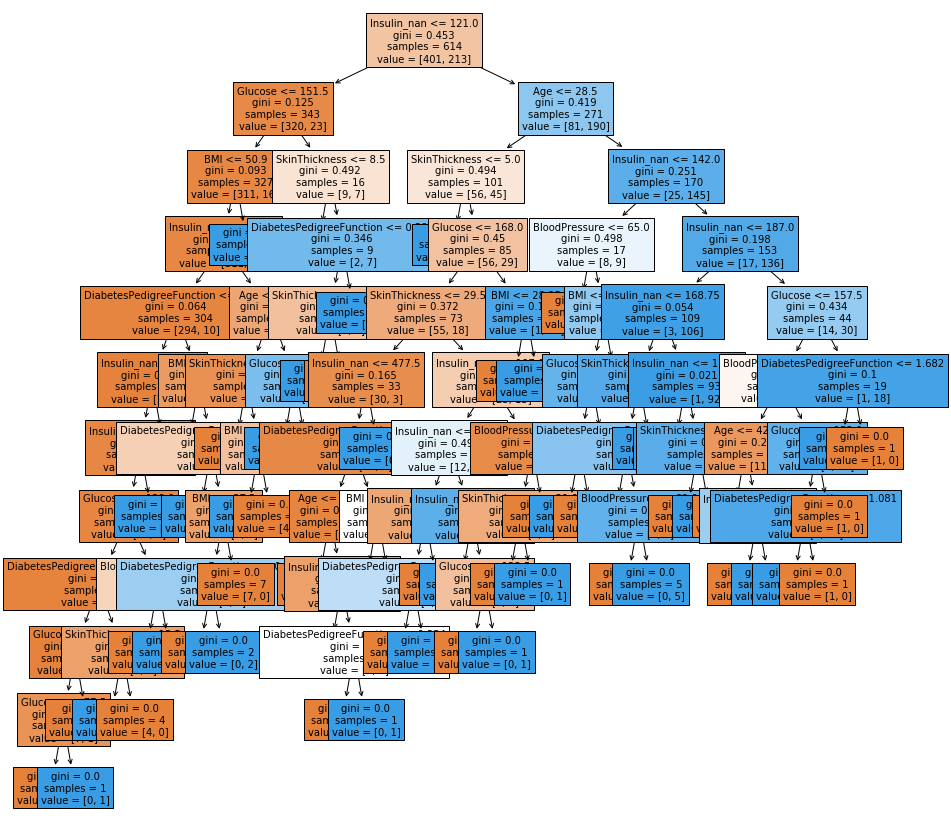

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [ ]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

## 정확도(Accuracy) 측정하기

In [ ]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.

abs(y_predict - y_test).sum()

28

In [ ]:
# accuracy score를 구합니다.

accuracy_score(y_test, y_predict) * 100

81.81818181818183